In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
input = '/content/drive/My Drive/Datasets/image classification/input.csv'
input_test = '/content/drive/My Drive/Datasets/image classification/input_test.csv'
labels = '/content/drive/My Drive/Datasets/image classification/labels.csv'
labels_test = '/content/drive/My Drive/Datasets/image classification/labels_test.csv'

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [44]:
X_train = np.loadtxt(input, delimiter=',')
X_test = np.loadtxt(input_test, delimiter=',')
y_train = np.loadtxt(labels, delimiter=',')
y_test = np.loadtxt(labels_test, delimiter=',')

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 30000)
(400, 30000)
(2000,)
(400,)


In [46]:
X_train = X_train.reshape(-1, 100, 100, 3)
X_test = X_test.reshape(-1, 100, 100, 3)

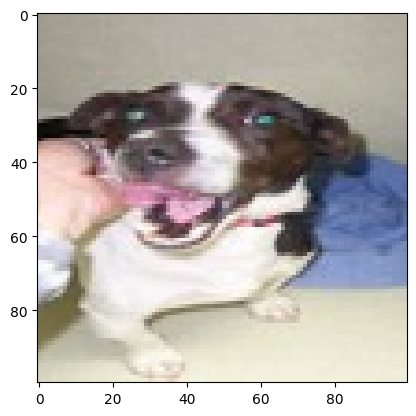

In [47]:
idx = random.randint(0, len(X_train))
image = X_train[idx].reshape(100, 100, 3)
plt.imshow(image.astype('uint8'))
plt.show()

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.5407 - loss: 37.8174 - val_accuracy: 0.1200 - val_loss: 1.0129
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 512ms/step - accuracy: 0.6988 - loss: 0.5591 - val_accuracy: 0.2950 - val_loss: 1.0274
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 494ms/step - accuracy: 0.7883 - loss: 0.4396 - val_accuracy: 0.3025 - val_loss: 1.3080
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 0.9054 - loss: 0.2572 - val_accuracy: 0.3800 - val_loss: 1.5018


In [53]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7887 - loss: 0.5093


[0.7248412370681763, 0.5249999761581421]

In [54]:
from sklearn.metrics import classification_report

# 👇 Get predicted class labels from probabilities
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")  # For binary classification

# 🧾 Print classification report
print(classification_report(y_test, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step
              precision    recall  f1-score   support

         0.0       0.51      0.98      0.67       200
         1.0       0.78      0.07      0.13       200

    accuracy                           0.53       400
   macro avg       0.65      0.53      0.40       400
weighted avg       0.65      0.53      0.40       400



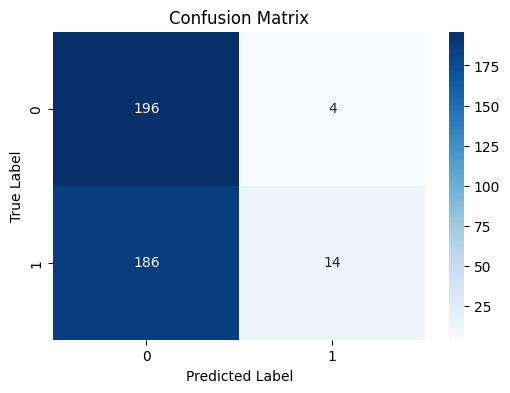

In [55]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap for nicer visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()